In [1]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os, sys
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = (20,5)

'''
Author: Enrico Ceccolini
'''

datadir = "/datasets/eurora_data/db1/"

# settings
#interval_comment = "Andrea"
#start_time = pd.to_datetime('2014-03-31')
#end_time = pd.to_datetime('2014-05-01')

#interval_comment = "Alina"
#start_time = pd.to_datetime('2014-09-30')
#end_time = pd.to_datetime('2014-11-01')

#interval_comment = "Whole"
#suffix = "_1min_"  

infile_jobs_to_nodes = datadir + "job_nodes.csv"

In [2]:
# obtain the id of all jobs runned in this node in the past
jobs_to_nodes_whole_data = pd.read_csv(infile_jobs_to_nodes)
print("jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

jobs_to_nodes_whole_data contains 469095 records


In [3]:
jobs_to_nodes_whole_data.head(1)

,job2node_id,node_id,job_id_string,ncpus,ngpus,nmics,mem_requested
0,1,17,498458.node129,16,0,0,14680064


In [4]:
grouped_jobs_to_node_data = jobs_to_nodes_whole_data.groupby('node_id')['job2node_id'].nunique().reset_index(name='counts')
print("{} distinct users".format(grouped_jobs_to_node_data.shape[0]))
# grouped_user_data.sort_values('counts', ascending=False)

64 distinct users


In [38]:
grouped_jobs_to_node_data

,node_id,counts
0,1,1974
1,2,241
2,3,2772
3,4,2577
4,5,554
5,6,1632
6,7,2456
7,8,1966
8,9,924
9,10,1934


In [63]:
num_jobs = [0] * 64

for i in range(1, 65):
    
    if(i < 43):
        if(grouped_jobs_to_node_data['counts'].iloc[i-1] < 2500):
            num_jobs[i-1] =  grouped_jobs_to_node_data['counts'].iloc[i-1]
        else:
            num_jobs[i-1] = 2500
    elif(i == 43):
        num_jobs[i-1] = 0
    else:
        if(grouped_jobs_to_node_data['counts'].iloc[i-2] < 2500):
            num_jobs[i-1] =  grouped_jobs_to_node_data['counts'].iloc[i-2] 
        else:
            num_jobs[i-1] = 2500

In [64]:
# num_jobs

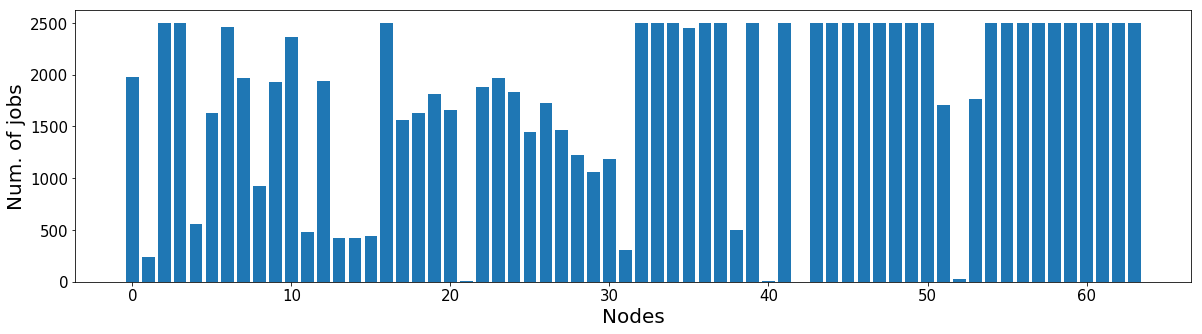

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

fig, ax = plt.subplots()

# Example data
nodes = ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64')
x_pos = np.arange(len(nodes))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.bar(x_pos, num_jobs)
#ax.set_yticks(y_pos)
#ax.set_xticklabels(nodes)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Num. of jobs', fontsize=20)
ax.set_xlabel('Nodes', fontsize=20)

plt.show()

In [66]:
num_jobs = [0] * 64

for i in range(1, 65):
    
    if(i < 43):
        num_jobs[i-1] =  grouped_jobs_to_node_data['counts'].iloc[i-1]
    elif(i == 43):
        num_jobs[i-1] = 0
    else:
        num_jobs[i-1] =  grouped_jobs_to_node_data['counts'].iloc[i-2] 


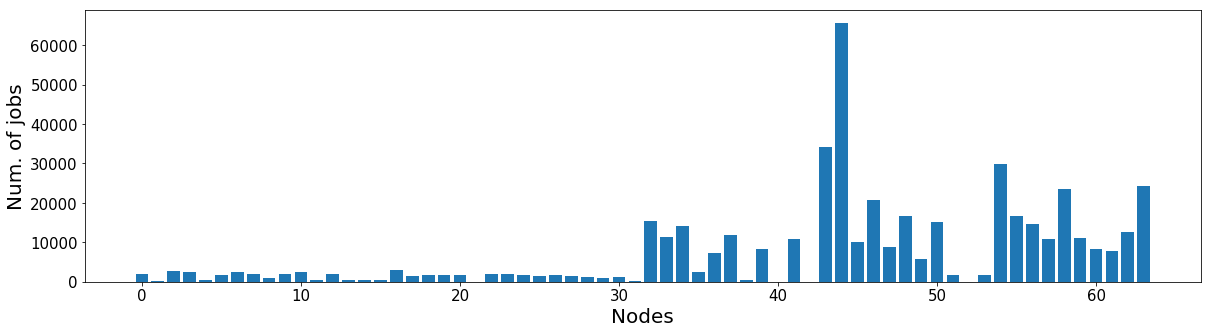

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

fig, ax = plt.subplots()

# Example data
nodes = ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64')
x_pos = np.arange(len(nodes))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.bar(x_pos, num_jobs)
#ax.set_yticks(y_pos)
#ax.set_xticklabels(nodes)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Num. of jobs', fontsize=20)
ax.set_xlabel('Nodes', fontsize=20)

plt.show()